In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:\Project\Machine learning\Time seires\AirPassengers.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
data["Month"]=pd.to_datetime(data["Month"])
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [8]:
data.set_index("Month",inplace=True)
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


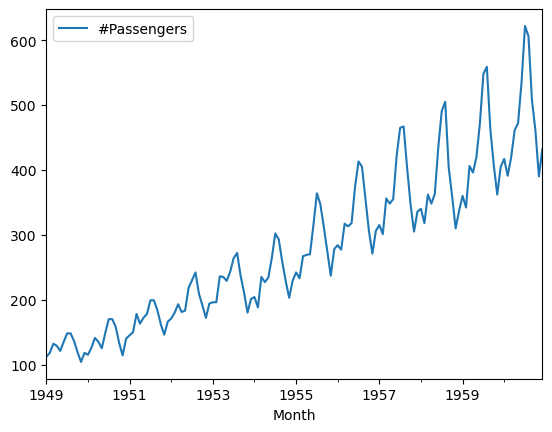

In [9]:
data.plot()
plt.show()

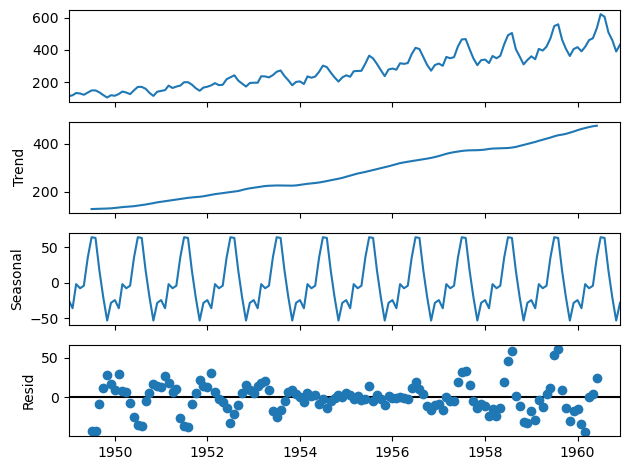

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(data)
decomposed.plot()
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(data)
pval=test_result[1]
pval

0.9918802434376411

In [13]:
if pval<0.05:
    ("data is stationary")
("data is not stationary")

'data is not stationary'

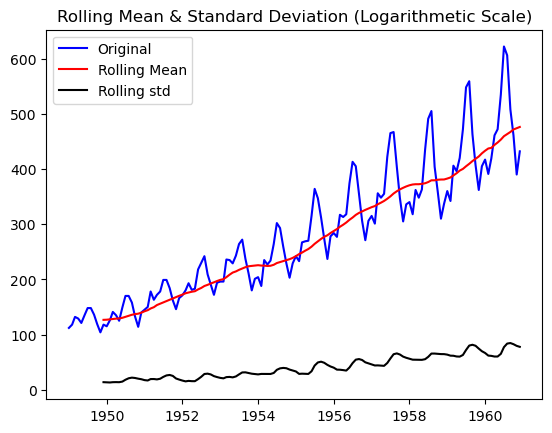

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [14]:
mean_log = data.rolling(window=12).mean()
std_log = data.rolling(window=12).std()
plt.plot(data,color="blue",label="Original")
plt.plot(mean_log,color="red",label="Rolling Mean")
plt.plot(std_log,color="black",label="Rolling std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation (Logarithmetic Scale)")
plt.show()
mean_log.head(20)

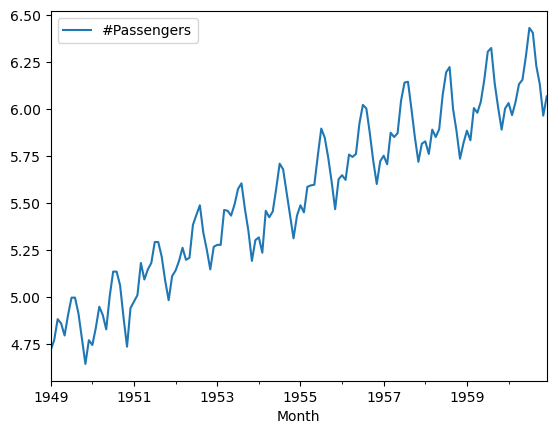

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [15]:
first_log = np.log(data)
first_log = first_log.dropna()
first_log.plot()
plt.show()
first_log

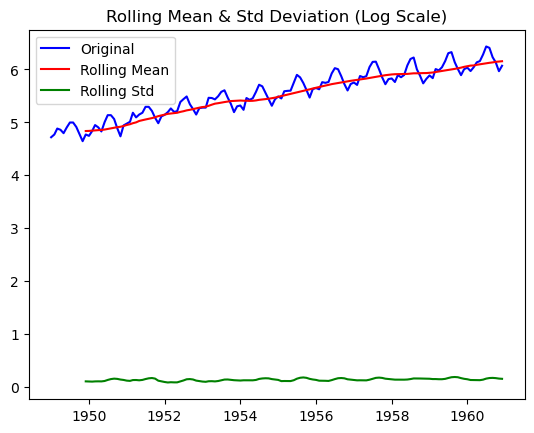

In [16]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()
plt.plot(first_log,color="blue",label="Original")
plt.plot(mean_log,color="red",label="Rolling Mean")
plt.plot(std_log,color="green",label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Std Deviation (Log Scale)")
plt.show()

In [17]:
new_data = first_log-mean_log
new_data = new_data.dropna()
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


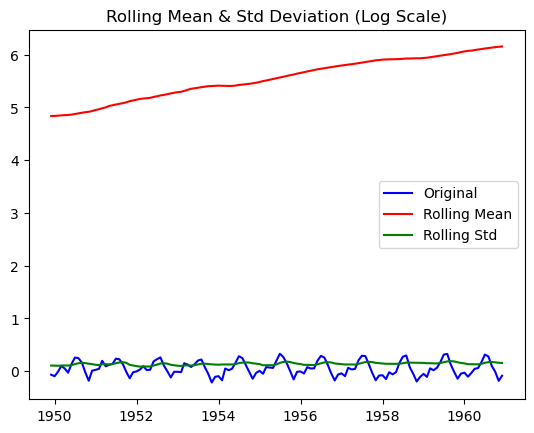

In [18]:
plt.plot(new_data,color="blue",label="Original")
plt.plot(mean_log,color="red",label="Rolling Mean")
plt.plot(std_log,color="green",label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Std Deviation (Log Scale)")
plt.show()

In [22]:
result = adfuller(new_data)
p_value = result[1]
p_value

0.02223463000124264

In [30]:
if p_value<0.05:
        ("data is stationary")
("data is not stationary")

'data is not stationary'

In [31]:
new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [32]:
train = new_data.iloc[:120]["#Passengers"]
test = new_data.iloc[120:]["#Passengers"]
train
test.shape

(13,)

C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


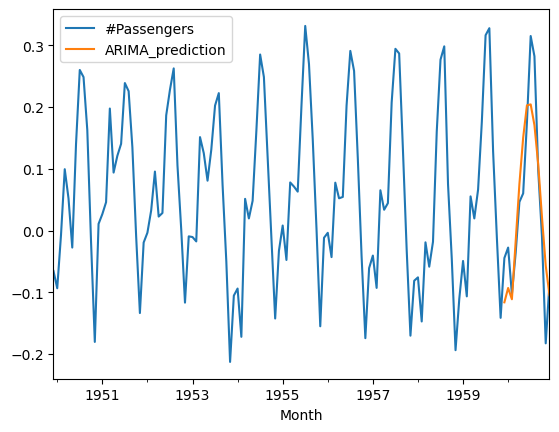

In [33]:
from statsmodels.tsa.arima.model import ARIMA
A_model = ARIMA(train,order=(6,1,6))
A_model = A_model.fit()
new_data["ARIMA_prediction"]=A_model.predict(start=len(train),end=len(train)+len(test)-1)
new_data.tail(20)
new_data[["#Passengers","ARIMA_prediction"]].plot()
plt.show()